
# BT 3051 - Data structures and algorithms
### Assignment - 4


 [Code submission](https://docs.google.com/forms/d/e/1FAIpQLSdoqjcqpqRyj0-7gBvpz8Eyd4sJQDkvS-o1Cnptp0FAvRoixA/viewform?usp=sf_link)

In [1]:
# We import NetworkX to create and run algorithms on graphs

import networkx as nx

### Q1

In our recent lab session, we applied BFS and DFS algorithms for graph traversal. As an additional task, your assignment is to construct the traversal tree generated by both algorithms. A traversal tree captures the order in which nodes or vertices are visited during the traversal. Were you able to identify all the edges in the original graph as well as in the traversal tree? If not, please provide insights into any missing edges and their implications within the graph. Perform this on the graph as illustrated below.

Starting node: Germany
Traversing order: Alphabetical priority (A-Z)
Your code should return traversal tree(both BFS,DFS) as an object of networkx and vizualize it.


In [2]:
# We import Matplotlib to make the network drawings more clear

import matplotlib.pyplot as plt

# We define a Queue class in order to implement breadth-first search. It has all the standard operations.

class Queue:

    def __init__(self):
        self.elements = []

    def is_empty(self):
        if len(self.elements) == 0:
            return True
        else:
            return False

    def enqueue(self, elements):
        if type(elements) != list:
            elements = [elements]
        self.elements = self.elements + elements

    def dequeue(self):
        if len(self.elements) == 0:
            return "dequeue() not possible"
        front = self.elements[0]
        self.elements = self.elements[1:]
        return front

    def front(self):
        return self.elements[0]

    def __str__(self):
        return " ".join([str(element) for element in self.elements])

    def __len__(self):
        return len(self.elements)

    
# We define a Stack class in order to implement depth-first search. It has all the standard operations.

class Stack:

    def __init__(self):
        self.elements = []

    def is_empty(self):
        if len(self.elements) == 0:
            return True
        else:
            return False

    def push(self, element):
        self.elements.append(element)

    def pop(self):
        if self.is_empty():
            return "pop() not possible"
        last = self.elements[-1]
        self.elements = self.elements[:-1]
        return last

    def top(self):
        return self.elements[-1]

    def __str__(self):
        return " ".join([str(element) for element in self.elements])

    def __len__(self):
        return len(self.elements)    

    
def BFS_with_traversal_tree(network, start_node):
    
    """
    Draws and returns the traversal tree of a network when breadth-first search is run on it.
    
    INPUT(S)
        network - nx.Graph()
        start_node - str
    
    OUTPUT(S)
        traversal_tree - nx.Graph()
        
    """
    
    # We label all the nodes of the network as "undiscovered".
    
    undiscovered = list(network.nodes)
    
    # We create a queue for the processing of nodes. The first node to be discovered will be the first node to be processed.
    # By processing, we mean that we make a note of the neighbours of the node.
    
    discovered = Queue()
    
    # We keep track of all the processed nodes with a list.
    
    processed = []
    
    # To keep track of how a node was discovered, we maintain a dictionary of node parents.
    
    parents = {}
    
    # We add the starting node to the queue and remove its label of being "undiscovered".

    discovered.enqueue(start_node)
    undiscovered.remove(start_node)
    
    # While there are still discovered nodes that have not been processed, we will traverse through the graph.

    while not discovered.is_empty():
        
        # We consider the node at the front of the queue and process it.
        
        node = discovered.dequeue()
        processed.append(node)
        
        # We make a list of neighbours of the current node being processed and sort them in alphabetic order in accordance
        # with the priority for exploration mentioned in the question.
        
        neighbours = list(network.neighbors(node))
        neighbours.sort()
        
        # We iterate through the list of neighbours and add them to the queue if they have not been discovered already.
        
        for neighbour in neighbours:
            if neighbour in undiscovered:
                undiscovered.remove(neighbour)
                discovered.enqueue(neighbour)
                
                # We note the parent of the neighbour to be the current node being processed.
                
                parents[neighbour] = node
    
    # We make a list of edges that will be present in the traversal tree by looking at the parent of every node.
        
    tree_edges = [(parent,child) for parent,child in parents.items()]
    
    # We create the traversal tree and draw it.
    
    traversal_tree = nx.Graph()
    traversal_tree.add_edges_from(tree_edges)
    nx.draw(traversal_tree, with_labels=True, font_weight='bold')

    # We return the traversal tree as a NetworkX object.
    
    return traversal_tree


def DFS_with_traversal_tree(network, start_node):
    
    """
    Draws and returns the traversal tree of a network when depth-first search is run on it.
    
    INPUT(S)
        network - nx.Graph()
        start_node - str
    
    OUTPUT(S)
        traversal_tree - nx.Graph()
        
    """
    
    # We label all the nodes of the network as "undiscovered".

    undiscovered = list(network.nodes)
    
    # We create a stack for the processing of nodes. The last node to be discovered will be the first node to be processed.
    # By processing, we mean that we make a note of the neighbours of the node.
    
    discovered = Stack()
    
    # We keep track of all the processed nodes with a list.  
    
    processed = []
    
    # To keep track of how a node was discovered, we maintain a dictionary of node parents.
    
    parents = {}
    
    # We add the starting node to the stack and remove its label of being "undiscovered".

    discovered.push(start_node)
    undiscovered.remove(start_node)

    # While there are still discovered nodes that have not been processed, we will traverse through the graph.

    while not discovered.is_empty():
        
        # We consider the node at the top of the stack and process it if it has not been processed already.

        node = discovered.pop()
        if node not in processed:
            processed.append(node)
        
        # We make a list of neighbours of the current node being processed and sort them in alphabetic order in accordance
        # with the priority for exploration mentioned in the question.        
        
        neighbours = list(network.neighbors(node))
        neighbours.sort(reverse=True)
        
        # We iterate through the list of neighbours and push them onto the stack if they have not been processed already.        
        
        for neighbour in neighbours:
            if neighbour not in processed:
                discovered.push(neighbour)
                
                # We note the parent of the neighbour to be the current node being processed.
                
                parents[neighbour] = node

    # We make a list of edges that will be present in the traversal tree by looking at the parent of every node.                
                
    tree_edges = [(key,value) for key,value in parents.items()]
    
    # We create the traversal tree and draw it.
    
    traversal_tree = nx.Graph()
    traversal_tree.add_edges_from(tree_edges)
    nx.draw(traversal_tree, with_labels=True, font_weight='bold')

    # We return the traversal tree as a NetworkX object.
    
    return traversal_tree

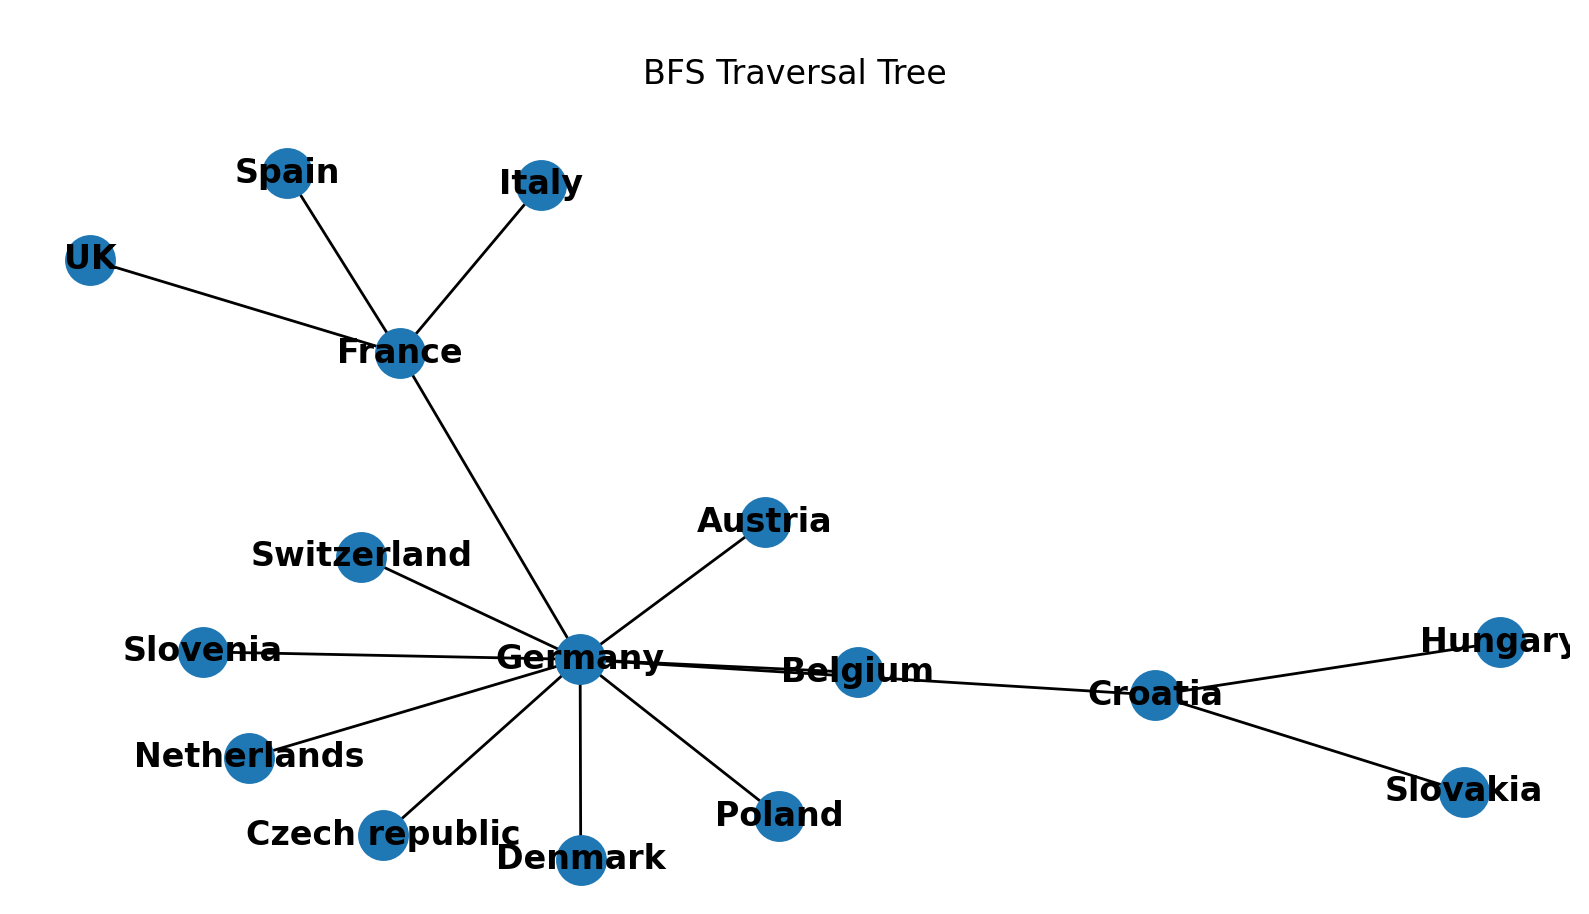

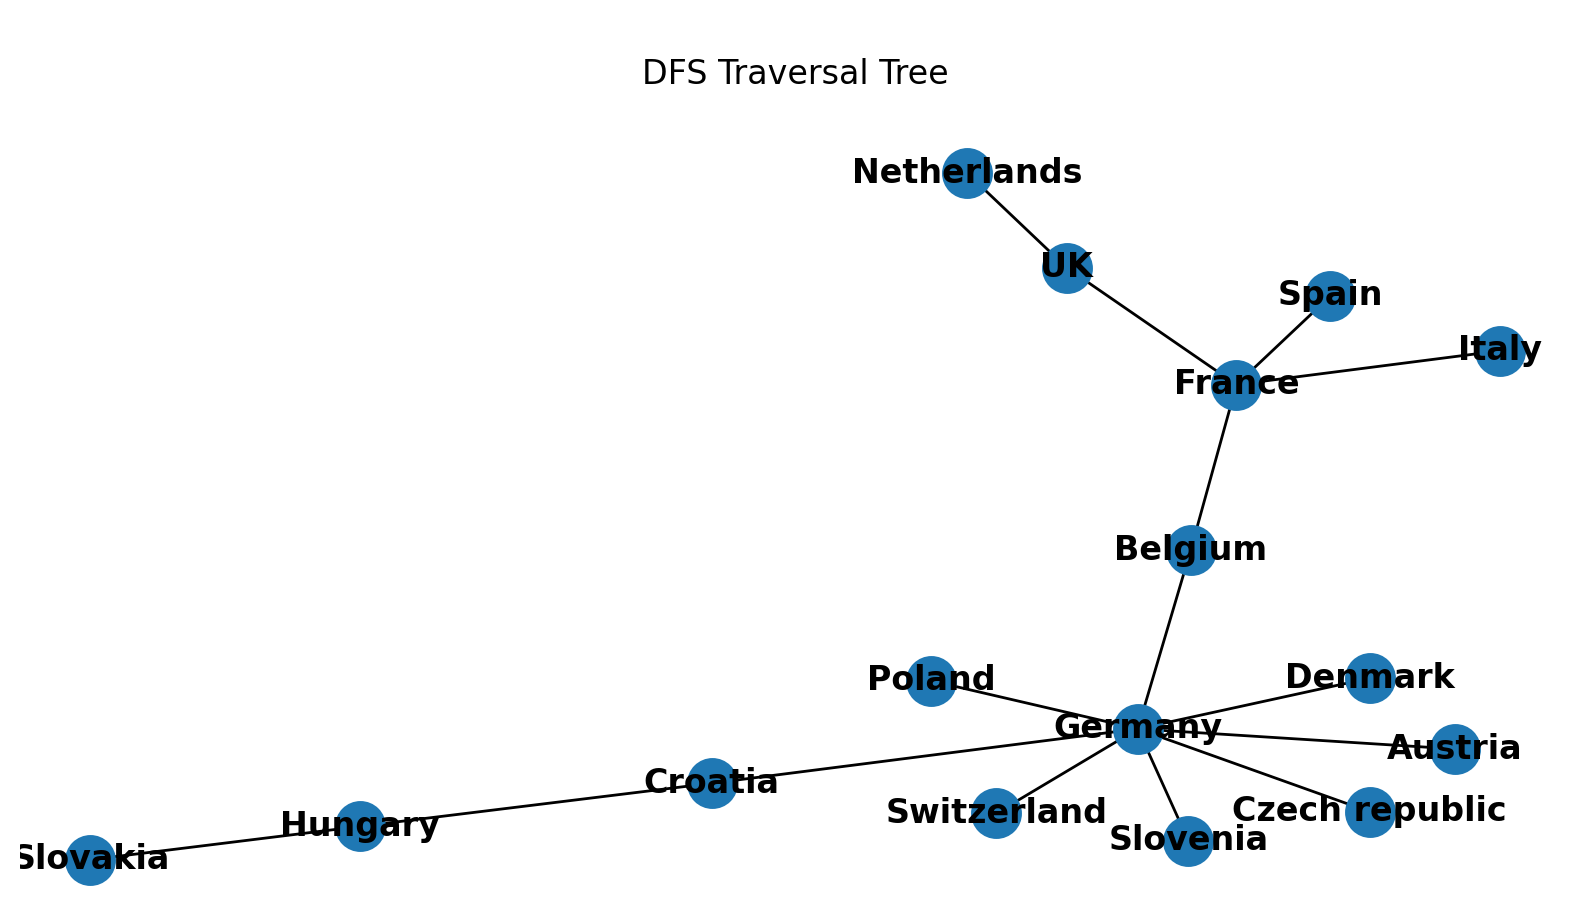

In [3]:
q1_network = nx.Graph()
q1_network.add_edges_from([("Germany","Poland"),("Germany","Denmark"),("Germany","Austria"),("Germany","Croatia"),("Germany","Slovenia"),("Germany","Czech republic"),("Germany","Switzerland"),("Germany","Belgium"),("Germany","France"),("Germany","Netherlands"),("Croatia","Hungary"),("Croatia","Slovakia"),("Slovakia","Hungary"),("Belgium","France"),("France","Italy"),("France","Spain"),("France","UK"),("UK","Netherlands")])
q1_start_node = "Germany"
plt.figure(dpi=200, figsize=(10,5))
plt.title("\nBFS Traversal Tree\n")
BFS_traversal_tree = BFS_with_traversal_tree(q1_network, q1_start_node)
plt.figure(dpi=200, figsize=(10,5))
plt.title("\nDFS Traversal Tree\n")
DFS_traversal_tree = DFS_with_traversal_tree(q1_network, q1_start_node)

## Q1 Answer

Not all the edges that are present in the original graph are present in the BFS traversal tree and the DFS traversal tree.

For example,<br>
Edges absent in the BFS tree - (UK, Netherlands), (France, Belgium), (Hungary, Slovakia) <br>
Edges absent in the DFS tree - (Germany, France), (Germany, Netherlands), (Croatia, Slovakia) <br>

This implies that not all edges are traversed when BFS and DFS are run on this graph.

Missing edges arise in the traversal tree when two daughter nodes of the current node being processed also have an edge between them. 

In BFS, such an edge between the daughter nodes will not appear in the traversal tree as these two nodes have already been discovered via the parent node. For example, (Hungary, Slovakia) is absent in the BFS tree despite that edge being present in the original graph. These nodes are connected to their parent node - Croatia.

However, in DFS, the edge between the parent and one of the daughter nodes will be missing and the edge between the two daughters will be present in the traversal tree. This is because DFS aims to explore a branch as deep as possible. Hence, the second daughter will be effectively accessed via the first daughter node. For example, (Croatia, Slovakia) is absent in the DFS tree despite that edge being present in the original graph. They are connected via Croatia's other daughter node - Hungary.

Thus, BFS and DFS may not be useful to solve problems such as finding an Eulerian path in the graph.

### Q2

Connected components are subsets of a graph in which every node is reachable from every other node in that subset by following edges. These components often represent distinct groups or communities within a graph. Your task is to repurpose Depth-First Search (DFS) or Breadth-First Search (BFS) to determine the number of connected components in any given graph.
Your code should print the number of connected components and return a dictionary with component id as key and list of nodes as values.


In [4]:
# We define a Queue class in order to implement breadth-first search. It has all the standard operations.

class Queue:

    def __init__(self):
        self.elements = []

    def is_empty(self):
        if len(self.elements) == 0:
            return True
        else:
            return False

    def enqueue(self, elements):
        if type(elements) != list:
            elements = [elements]
        self.elements = self.elements + elements

    def dequeue(self):
        if len(self.elements) == 0:
            return "dequeue() not possible"
        front = self.elements[0]
        self.elements = self.elements[1:]
        return front

    def front(self):
        return self.elements[0]

    def __str__(self):
        return " ".join([str(element) for element in self.elements])

    def __len__(self):
        return len(self.elements)
    
    
def connected_component_finder(network):
    
    """
    Prints the number of connected components in a network and returns the nodes constituting each of the identified
    connected components.
    
    INPUT(S)
        network - nx.Graph()
        
    OUTPUT(S)
        components_dict - dict
    
    """
    
    # We label all the nodes of the network as "undiscovered".

    undiscovered = list(network.nodes)
    
    # We define an empty dictionary to which connected components are added as and when they are found.
    
    components_dict = {}
    
    # We define the starting "Component ID" as 1.
    
    component_id = 1
    
    # We run BFS as long as there are undiscovered nodes.
    
    while len(undiscovered) != 0:
        
        # We initiate our BFS from the first node in the list of undiscovered nodes.
        
        start = undiscovered[0]
        
        # We perform a breadth-first search until there are no more nodes to be discovered in the connected component.
        # The logic used for BFS here is the same as that in the first question.
        
        discovered = Queue()
        processed = []

        discovered.enqueue(start)
        undiscovered.remove(start)
        
        while not discovered.is_empty():
            node = discovered.dequeue()
            processed.append(node)
            for neighbor in network.neighbors(node):
                if neighbor in undiscovered:
                    undiscovered.remove(neighbor)
                    discovered.enqueue(neighbor)
        
        # All the nodes that were processed during this run of BFS are assigned as a connected component and given an ID.
        
        components_dict[component_id] = processed
        
        # We increment the value of the component ID for the next run of BFS.
        
        component_id += 1
    
    # The number of connected components is the length of the dictionary. We print this value.

    no_of_connected_components = len(components_dict)
    print('The number of connected components is',no_of_connected_components)
    
    # We return the dictionary containing component ID and constituent nodes.
    
    return components_dict

In [5]:
q2_network = nx.Graph()
q2_network.add_edges_from([("A","B"),("A","C"),("B","C"),("C","H"),("D","E"),("D","F"),("E","F"),("D","G"),("G","I"),("K","L")])
q2_network.add_node("J")
components_dict = connected_component_finder(q2_network)

The number of connected components is 4


In [6]:
components_dict

{1: ['A', 'B', 'C', 'H'],
 2: ['D', 'E', 'F', 'G', 'I'],
 3: ['K', 'L'],
 4: ['J']}

### Q3
**Emergency Response Planning**

You are responsible for planning emergency response routes for a city. The city is represented as a graph, with intersections as nodes and roads as edges. In the event of an emergency, you need to find the shortest path from a central emergency command center to various locations in the city to minimize response time. The city's road network is represented as an undirected weighted graph, where each road has a known travel time (weight) associated with it. Your task is to find the shortest paths from the central emergency command center **(Node F)** to all other intersections in the city.

Your code should return a nested list of [Source, Target, Duration]. Ex [[F,C,2],....]

In [7]:
# We import the math library to use math.inf to denote undiscovered nodes.

import math


def shortest_path_finder(network):
    
    """
    Runs Dijkstra's algorithm and returns the shortest distance between the given starting node and every node in 
    the network.
    
    INPUT(S)
        network - nx.Graph()
        
    OUTPUT(S)
        shortest_distances - list[list]
        
    """
    
        # First, we define a helper function to identify the unprocessed (but discovered) node with highest priority, or least
        # distance from the starting node.
    
    def find_priority(scores,processed):
            
        # We set infinity as the initial baseline for comparison and the "best" node as None.
            
        min_score = math.inf
        best_node = None
            
        # We iterate through the nodes in the network and check if their distance from the starting node is the least
        # and if the node has not been processed yet.
            
        for node,score in scores.items():
            if score < min_score and node not in processed:
                min_score = score
                best_node = node
                    
        # We return the unprocessed node with the least distance from the starting node.
            
        return best_node
        
        
    # We maintain a list of processed nodes.
        
    processed = []
        
    # We create a dictionary to keep track of the minimum distance between every node and the starting node. This is
    # initialised as infinity for all nodes.
        
    scores = {node:math.inf for node in network.nodes}
        
    # We define the starting node to be "F" as mentioned in the question and set its distance (from itself) as 0.
        
    start = "F"
    scores[start] = 0
        
    # While there are still unprocessed nodes, we traverse the network.

    while len(processed) != len(network.nodes):
            
        # The node chosen to be processed is the discovered node with highest priority.

        current = find_priority(scores,processed)
        processed.append(current)
            
        # We iterate through the neighbours of the current node being processed and update its shortest distance from
        # the starting node, if necessary.
            
        for node in network.neighbors(current):
                
            # If the distance between the starting node and the neighbour is greater than the sum of the distances
            # between the starting node and the current node and the current node and the neighbour, we will update
            # the minimum distance.
                
            if scores[current] + network.get_edge_data(current,node)["weight"] < scores[node]:
                scores[node] = scores[current] + network.get_edge_data(current,node)["weight"]
            
    # We define a list of lists containing information about the shortest distances between the start node and every
    # node in the network.
        
    shortest_distances = [[start,node,scores[node]] for node in network.nodes]
        
    # We return the shortest distances.
        
    return shortest_distances

In [8]:
q3_network = nx.Graph()
q3_network.add_edge("A","B",weight=4)
q3_network.add_edge("A","E",weight=8)
q3_network.add_edge("B","E",weight=11)
q3_network.add_edge("B","C",weight=8)
q3_network.add_edge("E","F",weight=7)
q3_network.add_edge("C","F",weight=2)
q3_network.add_edge("G","F",weight=6)
q3_network.add_edge("G","E",weight=1)
q3_network.add_edge("C","H",weight=4)
q3_network.add_edge("G","H",weight=2)
q3_network.add_edge("C","D",weight=7)
q3_network.add_edge("H","D",weight=14)
q3_network.add_edge("H","I",weight=10)
q3_network.add_edge("D","I",weight=9)

shortest_path = shortest_path_finder(q3_network)

In [9]:
shortest_path

[['F', 'A', 14],
 ['F', 'B', 10],
 ['F', 'E', 7],
 ['F', 'C', 2],
 ['F', 'F', 0],
 ['F', 'G', 6],
 ['F', 'H', 6],
 ['F', 'D', 9],
 ['F', 'I', 16]]